## NLP Topic Modeling - Data Science Portfolio - Maximilian Koch

**Dataset**: News headlines<br>
**Target variable**: Sentiment, topics<br>
**Features**: time, content<br>
**Techniques applied**: NLP Preprocessing, TF-IDF, sentiment analysis, topic modeling<br>


For both of the NLP notebooks I decided to use a news category dataset, available on Kaggle (https://www.kaggle.com/datasets/rmisra/news-category-dataset/data)

References:
1. Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).


### Preprocessing

As the dataset is rather large, I ran the code using Google Colab and not locally as else it would have taken too long!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Maximilian Koch - News Dataset.json', lines=True)

In [ ]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
#Getting the description of all political articles and their publishment date
df = df.loc[df['category'] == 'POLITICS'][['headline','short_description','date']]
df = df[df['short_description'] != ""] #remove empty descriptions and headlines
df = df[df['headline'] != ""]
df['year'] = df['date'].dt.year

In [ ]:
df

,headline,short_description,date,year
21,Biden Says U.S. Forces Would Defend Taiwan If ...,President issues vow as tensions with China rise.,2022-09-19,2022
24,‘Beautiful And Sad At The Same Time’: Ukrainia...,An annual celebration took on a different feel...,2022-09-19,2022
30,Biden Says Queen's Death Left 'Giant Hole' For...,"U.S. President Joe Biden, in London for the fu...",2022-09-18,2022
40,Bill To Help Afghans Who Escaped Taliban Faces...,Republican outrage over the shoddy U.S. withdr...,2022-09-16,2022
44,Mark Meadows Complies With Justice Dept. Subpo...,The former White House chief of staff has turn...,2022-09-15,2022
...,...,...,...,...
133561,Tom Cotton Wants to Make Medicare Doubly Dead....,"If it were up to Tom Cotton, Medicare would be...",2014-04-19,2014
133582,What Democrats Must Do to Win in November,"This November, Democrats will have chance to r...",2014-04-19,2014
133644,Why Chris Christie Should NOT Be President,Apparently that's just the way they play polit...,2014-04-18,2014
133652,GOP's Old Ploy: Tag President Obama as the Rac...,The baiting and the assault on Obama will get ...,2014-04-18,2014


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import contractions

import re

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import spacy

In [ ]:
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#many people were sometimes mentioned with just last name and other times with their full name,
#so I added this coreference map
coreference_map = {'biden' : 'joe_biden', 'trump' : 'donald_trump',
                    'hillary' : 'hillary_clinton', 'clinton' : 'hillary_clinton',
                   #Clinton only refers to Hillary and not Bill Clinton
                    'kamala' : 'kamala_harris', 'harris' : 'kamala_harris',
                    'obama' : 'barack_obama', 'kavanaugh' : 'brett_kavanaugh',
                   'bernie' : 'bernie_sanders', 'sander' : 'bernie_sanders'}

replacements = {
    'U.S.': 'usa', 'US': 'usa','Sen.': 'senator',
    'Rep.' : 'republican', 'Dem.' : 'democrat',
    'coronavirus' : 'covid19'
}

#these are the relevant names I found, which were not recognized by the NER
#so had to manually replace
ner_fix = {'donald trump' : 'donald_trump',
            'tom cotton' : 'tom_cotton'}

def coreference(text):
    tokens = text.split()
    resolved_tokens = [coreference_map.get(token, token) for token in tokens]
    return " ".join(resolved_tokens)

def expand_contractions(text):
    for old, new in replacements.items():
        text = text.replace(old, new) #manual fix
    return contractions.fix(text)

def clean_text(text):
    text = re.sub(r"[^\w\s']", '', text)  # Remove unwanted characters
    text = re.sub(r"'s\b", '', text)  # Remove 's genitives
    return text.lower()

#puts together words like United States to united_states etc.
def ner(text):
    doc = nlp(text)
    tokens = []
    entity_positions = {ent.start: "_".join(ent.text.split()) for ent in doc.ents}
    for i, token in enumerate(doc):
        if i in entity_positions:
            tokens.append(entity_positions[i])
        elif not any([ent.start <= i < ent.end for ent in doc.ents]):
            tokens.append(token.text)
    text = " ".join(tokens)
    for old, new in ner_fix.items():
        text = text.replace(old, new)
    return text

def tokenize(text):
    return word_tokenize(text)

def stop_word_removal(tokens):
    stop_words = set(stopwords.words('english')).union({"'"})
    return [word for word in tokens if word.lower() not in stop_words]

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocessing(text):
    pipe = [expand_contractions, clean_text, ner, coreference, tokenize, stop_word_removal, lemmatize]
    for process in pipe:
        text = process(text)
    return text


### TF-IDF by Year

In [ ]:
import math
from collections import Counter

def compute_tf(documents):
    tf_documents = []
    for document in documents:
        tf_documents.append(Counter(document))
    return tf_documents

def compute_idf(tf_documents):
    df = Counter()
    for tf in tf_documents:
        for term in tf.keys():
            df[term] += 1
    idf = {}
    total_documents = len(tf_documents)
    for term, count in df.items():
        idf[term] = math.log(total_documents / float(count))
    return idf

def compute_tf_idf_manual(documents):
    tf_documents = compute_tf(documents)
    idf = compute_idf(tf_documents)
    tf_idf_documents = []
    for tf in tf_documents:
        tf_idf = {}
        for term, frequency in tf.items():
            tf_idf[term] = frequency * idf[term]
        tf_idf_documents.append(tf_idf)
    return tf_idf_documents

def get_highest_values(input_dict, N=10):
    return sorted(input_dict.items(), key=lambda item: item[1], reverse=True)[:N]


Putting all the headlines of each year together in a string, so that the top topics for each year can be determined.

In [ ]:
grouped = df.groupby('year')['headline'].apply(' '.join).reset_index()

In [ ]:
grouped

,year,headline
0,2014,Breathe: Raising the Voice of Justice China's ...
1,2015,How The Bond Between Police And Prosecutors Im...
2,2016,Code Associated With Russia Hacking Found On V...
3,2017,Lessons From This Year's Open Enrollment Seaso...
4,2018,Ocasio-Cortez Says Claire McCaskill Calling He...
5,2019,NYT's Bret Stephens Faces Criticism For Citing...
6,2020,Lindsey Graham Calls For Stand-Alone Vote On $...
7,2021,'A Hell Of A Year': GOP Anticipating A Triumph...
8,2022,Biden Says U.S. Forces Would Defend Taiwan If ...


In [ ]:
grouped['tokens'] = grouped['headline'].apply(preprocessing)

In [ ]:
grouped['tfidf'] = compute_tf_idf_manual(grouped['tokens'])
grouped['tfidf_top']  = grouped['tfidf'].apply(get_highest_values)

#These are the top words by year
for year, word_list in zip(grouped.year.unique(), grouped['tfidf_top']):
    print(year, ' '.join(word for word, freq in word_list))

2014 2014 ferguson roundup isi iraq sunday ebola midterm guide nonpartisan
2015 san_bernardino rubio huffpost jeb_bush parenthood ben_carson sander isi heroin marco
2016 donald_trump huffpost hill recount presidentelect stein carrier standing hacking exxon
2017 doug_jones roy_moore roy moore donald_trump franken mueller al jerusalem neutrality
2018 brett_kavanaugh donald_trump mueller brett christine haspel blasey_ford gina separation patrol
2019 impeachment donald_trump mueller beto alexandria_ocasiocortez ilhan_omar duncan_hunter yovanovitch doral scaramucci
2020 coronavirus covid19 donald_trump joe_biden mask pandemic lou dobbs lincoln qanon
2021 january_6 vaccine covid19 joe_biden mask riot marjorie covid donald_trump greene
2022 january_6 marjorie text greene riot affidavit joe_biden donald_trump taylor ukraine


### Vader Sentiment

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    return compound_score

Did the average sentiment of news headlines change in recent years?

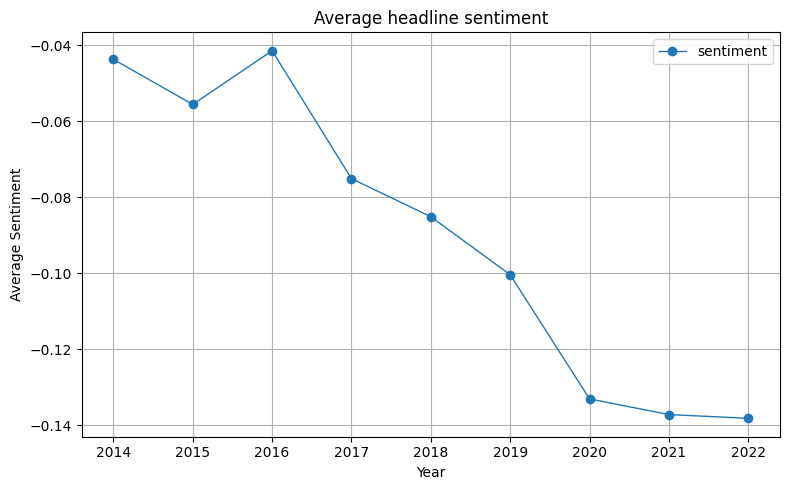

In [ ]:
import matplotlib.pyplot as plt

df['sentiment'] = df['headline'].apply(get_sentiment)
fig, ax = plt.subplots(figsize=(8,5))
df.groupby(['year'])['sentiment'].mean().plot(ax=ax, marker='o', lw=1)

ax.set_xlabel('Year')
ax.set_ylabel('Average Sentiment')
ax.set_title("Average headline sentiment")

ax.grid(True)
fig.tight_layout()
plt.legend()
plt.show()

Average sentiment of politics news headlines decreased!

### Topic modeling

In [ ]:
from gensim import corpora, models
import gensim

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.3 MB/s eta 0:00:00


I used optuna's Bayesian Optimization for hyperparameter tuning of the LDA model,
as given the large dataset guessing/estimating the parameters would not work out well.

In [ ]:
import optuna
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.model_selection import train_test_split

df['tokens'] = df['headline'].apply(preprocessing)
#60, 20, 20 split. Given the hyperparameter tuning, validation set makes sense.
train_texts, temp_texts = train_test_split(df['tokens'], test_size=0.4)
val_texts, test_texts = train_test_split(temp_texts, test_size=0.5)

dictionary = corpora.Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]
train_corpus = [dictionary.doc2bow(text) for text in train_texts]
val_corpus = [dictionary.doc2bow(text) for text in val_texts]
test_corpus = [dictionary.doc2bow(text) for text in test_texts]

best_model = 0
def objective(trial):
    global best_model

    num_topics = trial.suggest_int('num_topics', 5, 40)
    alpha_choice = trial.suggest_categorical('alpha_choice', ['symmetric', 'asymmetric', 'numeric'])
    if alpha_choice == 'numeric':
        alpha = trial.suggest_float('alpha_numeric', 0.01, 0.1, log=True)
    else:
        alpha = alpha_choice
    eta_choice = trial.suggest_categorical('eta_choice', ['symmetric', 'numeric'])
    if eta_choice == 'numeric':
        eta = trial.suggest_float('eta_numeric', 0.01, 0.1, log=True)
    else:
        eta = eta_choice
    passes = trial.suggest_int('passes', 10, 20)
    lda_model = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics,
        chunksize=1000, passes=passes, alpha=alpha, eta=eta)

    coherence_model = CoherenceModel(model=lda_model, texts=val_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    if trial.number == 0:
        best_model = lda_model
    elif coherence_score > trial.study.best_value:
        best_model = lda_model

    return coherence_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print(best_model)

test_coherence_model = CoherenceModel(model=best_model, texts=test_texts, dictionary=dictionary, coherence='c_v')
test_coherence_score = test_coherence_model.get_coherence()
print(f'Test Coherence Score: {test_coherence_score}')


[I 2024-12-04 18:28:21,754] A new study created in memory with name: no-name-aa0a5f08-ed07-44a6-9c9a-79e781445c62
[I 2024-12-04 18:29:08,959] Trial 0 finished with value: 0.6331707565072179 and parameters: {'num_topics': 34, 'alpha_choice': 'symmetric', 'eta_choice': 'symmetric', 'passes': 12}. Best is trial 0 with value: 0.6331707565072179.
[I 2024-12-04 18:29:44,941] Trial 1 finished with value: 0.3521688172714221 and parameters: {'num_topics': 5, 'alpha_choice': 'numeric', 'alpha_numeric': 0.046009659787181065, 'eta_choice': 'symmetric', 'passes': 10}. Best is trial 0 with value: 0.6331707565072179.
[I 2024-12-04 18:30:32,213] Trial 2 finished with value: 0.41329317875866245 and parameters: {'num_topics': 8, 'alpha_choice': 'symmetric', 'eta_choice': 'numeric', 'eta_numeric': 0.030301055206216038, 'passes': 15}. Best is trial 0 with value: 0.6331707565072179.
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by 

LdaModel<num_terms=16366, num_topics=39, decay=0.5, chunksize=1000>
Test Coherence Score: 0.6561334385281937


In [ ]:
study.best_params

{'num_topics': 39,
 'alpha_choice': 'numeric',
 'alpha_numeric': 0.010240471796956942,
 'eta_choice': 'symmetric',
 'passes': 17}

In [ ]:
topics = best_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(16, '0.143*"donald_trump" + 0.100*"supreme_court" + 0.070*"twitter" + 0.064*"case" + 0.043*"chief" + 0.034*"move" + 0.030*"many" + 0.028*"presidency" + 0.025*"best" + 0.024*"sign"')
(17, '0.175*"state" + 0.052*"immigration" + 0.039*"donald_trump" + 0.035*"crisis" + 0.034*"border" + 0.030*"general" + 0.029*"real" + 0.026*"dreamer" + 0.026*"attorney" + 0.024*"effort"')
(19, '0.073*"really" + 0.066*"secretary" + 0.057*"end" + 0.056*"congressman" + 0.051*"keep" + 0.040*"latest" + 0.035*"spending" + 0.031*"secret" + 0.030*"hope" + 0.028*"private"')
(38, '0.103*"donald_trump" + 0.069*"russia" + 0.069*"stop" + 0.049*"nominee" + 0.047*"probe" + 0.039*"reform" + 0.037*"elizabeth_warren" + 0.032*"open" + 0.029*"investigation" + 0.021*"say"')
(9, '0.059*"u" + 0.055*"child" + 0.053*"let" + 0.052*"day" + 0.051*"thing" + 0.040*"kid" + 0.040*"hearing" + 0.039*"city" + 0.035*"government" + 0.033*"reason"')
(14, '0.128*"law" + 0.059*"immigrant" + 0.053*"politics" + 0.052*"block" + 0.047*"conservative"

Some topics seem quite coherent, like topic 17, which is on immigrants at the border (to Mexico), especially child immigrants and so called 'dreamer' children. Some other topics, like topic 16, which is on Trump's twitter usage, indicate some direction on the topic.
Using a more advanced vectorizer could improve the performance.

Below, I chose topic 17 to see the distribution over time, with three main events marked, which might explain the spikes.

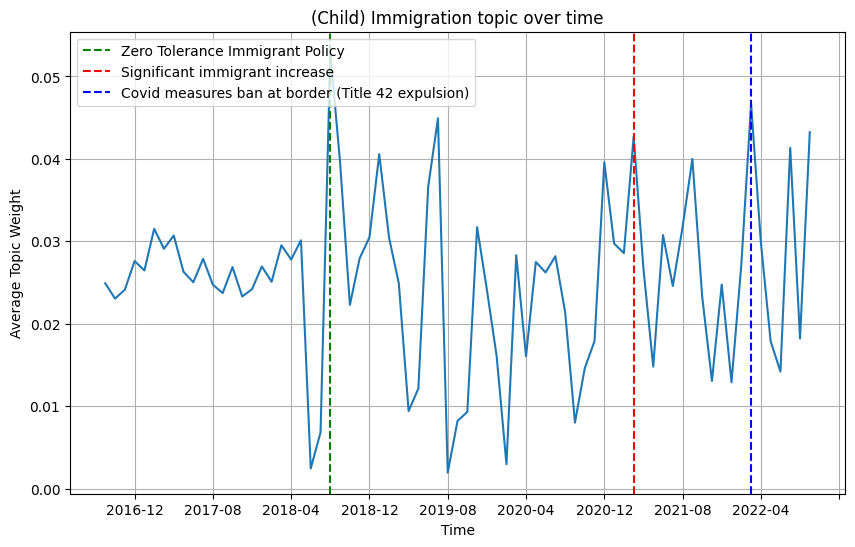

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

topic_distributions = []
for doc in corpus:
    topics = best_model.get_document_topics(doc, minimum_probability=0.0)
    topic_distributions.append([prob for _, prob in topics])

topic_df = pd.DataFrame(topic_distributions, columns=[f"Topic {i}" for i in range(best_model.num_topics)])
df_with_topics = pd.concat([df.reset_index(drop=True), topic_df], axis=1)

numeric_columns = [f"Topic {i}" for i in range(best_model.num_topics)]
df_with_topics[numeric_columns] = df_with_topics[numeric_columns].astype(float)

topic_trends = df_with_topics.groupby(df_with_topics['date'].dt.to_period('M'))[numeric_columns].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(topic_trends['date'].astype(str), topic_trends['Topic 17'])
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.xlabel('Time')
plt.ylabel('Average Topic Weight')
plt.title('(Child) Immigration topic over time')
plt.axvline('2018-08', linestyle='--', color='green',label='Zero Tolerance Immigrant Policy')
plt.axvline('2021-03', linestyle='--', color='red',label='Significant immigrant increase')
plt.axvline('2022-03', linestyle='--', color='blue',label='Covid measures ban at border (Title 42 expulsion)')
plt.legend()
plt.grid()
plt.show()

BERT was not available for topic modeling, although it could lead to more accurate better insights and works better with short data.